In [1]:
import math, time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Latitude_list = []
Longitude_list = []

In [3]:
file = open('./vehicle1.txt','r')
coordinates = file.readline()
coordinates = coordinates.split ("', '")
coordinates
len(coordinates)

for i in range(432):
    gps_message = coordinates[i]
    gps_message = gps_message .split(',')
#     print(gps_message)
    

    Latitude = gps_message [3]
    # print (Latitude)     
    lat_deg = round (float(Latitude)/100,0)
    lat_min = (float(Latitude)%100)/60
    Latitude = lat_deg + lat_min


    Longitude = gps_message [5]
    # print (Longitude)  
    lng_deg = round (float(Longitude)/100,0)
    lng_min = (float(Longitude)%100)/60
    Longitude = lng_deg + lng_min

    Latitude_list.append (Latitude)
    Longitude_list.append (Longitude)
#     gps_table = pd.DataFrame ({'Lattitude':Latitude_list,
#                               'Longitude':Longitude_list})


/Users/andreysmac/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


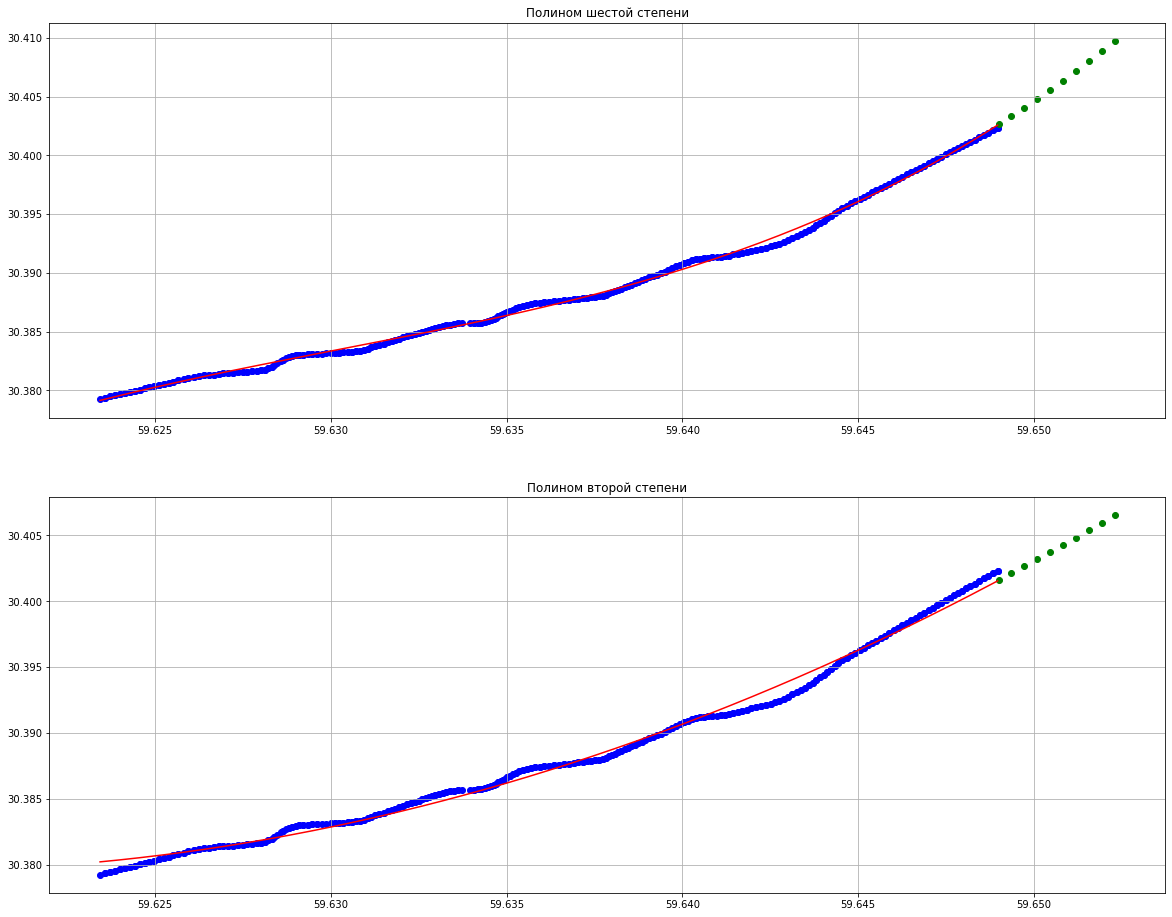

In [4]:
p = np.poly1d(np.polyfit(Latitude_list, Longitude_list, 6))
p2 = np.poly1d(np.polyfit(Latitude_list, Longitude_list, 2))

Latitude_list_new = np.linspace(59.649, 59.6523, 10)

fig,(ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))

ax1.scatter(Latitude_list, Longitude_list, color = 'blue')
ax1.plot(Latitude_list, p(Latitude_list), color = 'red')
ax1.scatter(Latitude_list_new, p(Latitude_list_new), color = 'green')
ax1.grid(True)
ax1.set_title ('Полином шестой степени')


ax2.scatter(Latitude_list, Longitude_list, color = 'blue')
ax2.plot(Latitude_list, p2(Latitude_list), color = 'red')
ax2.scatter(Latitude_list_new, p2(Latitude_list_new), color = 'green')
ax2.grid(True)
ax2.set_title ('Полином второй степени')

plt.savefig('graph.jpeg')
plt.show()


In [5]:
p.coef

array([ 9.88220346e-04, -5.89169578e-02, -3.51462393e+00, -4.59996493e-02,
        1.24955733e+04,  7.45363797e+05, -4.44389170e+07])

In [6]:
from sklearn.metrics import mean_absolute_error
print('MAE полином шестой степени:', mean_absolute_error(Longitude_list, p(Latitude_list)))
print('MAE полином второй степени:', mean_absolute_error(Longitude_list, p2(Latitude_list)))

MAE полином шестой степени: 0.0002345106227979146
MAE полином второй степени: 0.00038715245627833167
